In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [342]:
!pip install pmdarima

In [343]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import pmdarima as pm

# Data 불러오기
 

In [344]:
#Data 불러오기. KMSK data를 다운 받음. BI에서 crosstap기능 이용
#from google.colab import files
#myfile = files.upload()

In [395]:
df = pd.read_csv("https://raw.githubusercontent.com/parandeung/BCWoo/main/SCFI_SHA_KR_JP_Freight.csv")
df.tail()

,Year_Week,SHA_AVG,SCFI_PKG,KR_AVG,JP_AVG,Year,Week,Date
55,22-9,1321,1132,1579,1343,2022,9,2022-02-28
56,22-10,1367,1110,1629,1349,2022,10,2022-03-07
57,22-11,1302,1056,1624,1394,2022,11,2022-03-14
58,22-12,1258,1035,1555,1297,2022,12,2022-03-21
59,2022-13,1235,1020,1691,1313,2022,13,2022-03-28


In [394]:
df['Date']=pd.to_datetime(df['Date'])
df.head(2)

,Year_Week,SHA_AVG,SCFI_PKG,KR_AVG,JP_AVG,Year,Week,Date
0,21-7,1273,1046,840,867,2021,7,2021-02-08
1,21-8,1244,1027,856,939,2021,8,2021-02-15


In [347]:
df.dtypes

Year_Week            object
SHA_AVG               int64
SCFI_PKG              int64
KR_AVG                int64
JP_AVG                int64
Year                  int64
Week                  int64
Date         datetime64[ns]
dtype: object

In [348]:
df_t=df[['Date','SHA_AVG']]
df_t.set_index("Date", inplace=True)
df_t= df_t[:60]
df_t.tail(2)

,SHA_AVG
Date,
2022-03-21,1258
2022-03-28,1235


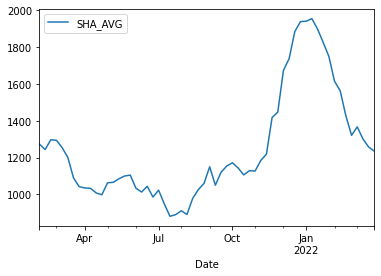

In [349]:
fig = df_t.plot()

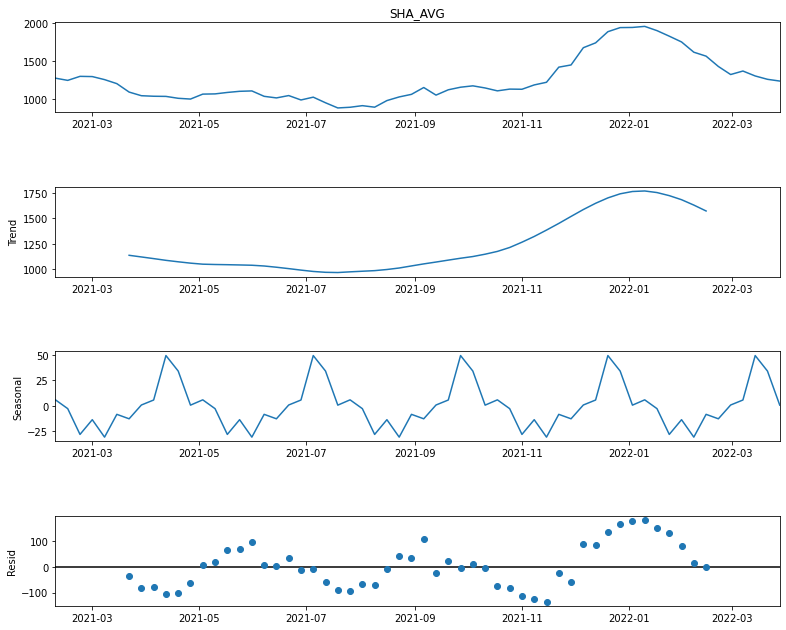

In [350]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_t['SHA_AVG'],model='additive', period=12)
fig=res.plot()
fig.set_size_inches(12,10)
plt.show()

In [351]:
!pip install --upgrade openpyxl

# 일반 ARIMA - 차분

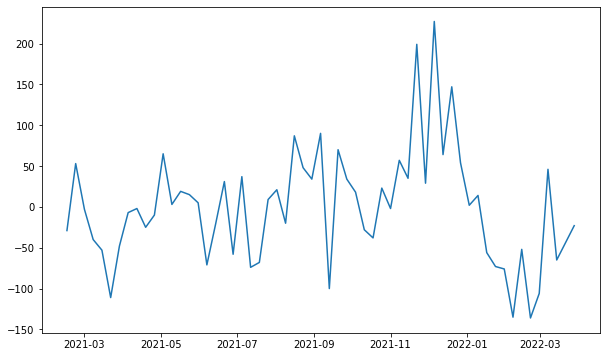

In [352]:
#1차 차분
diff_1=df_t['SHA_AVG'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_1)
plt.show()

# 일반 ARIMA  - ACF, PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



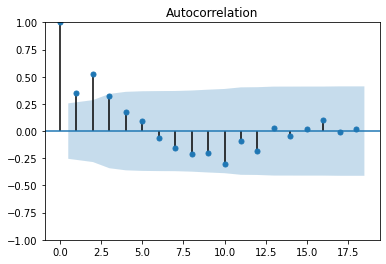

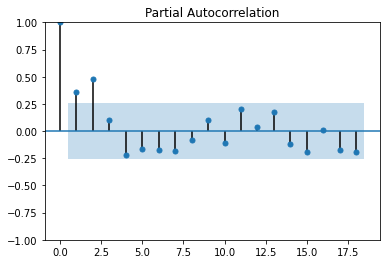

In [353]:
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

# 일반 ARIMA - ARIMA(p,d,q)판단
 

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
아래는 arima 라이브러리 바뀌어서 바뀐것으로 한 것임

In [354]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_t['SHA_AVG'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SHA_AVG   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -326.894
Date:                Mon, 25 Apr 2022   AIC                            659.788
Time:                        08:40:31   BIC                            666.021
Sample:                    02-08-2021   HQIC                           662.221
                         - 03-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7989      0.159      5.013      0.000       0.487       1.111
ma.L1         -0.4866      0.262     -1.860      0.063      -0.999       0.026
sigma2      3781.6472    607.016      6.230      0.000    2591.918    4971.376
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 7.19
Prob(Q):                              0.22   Prob(JB):                         0.03
Heteroskedasticity (H):               3.49   Skew:                             0.69
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [355]:
#Optimal한 파라미터 조합을  aic값을 이용하여 구함
import itertools
#Parameter search
print('Examples of parameter combination for ARIMA...')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools. product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(df_t.values, order = (i))
    model_fit = model.fit()
    print(f'ARIMA:{i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

Examples of parameter combination for ARIMA...
ARIMA:(0, 1, 0) >> AIC : 670.48
ARIMA:(0, 1, 1) >> AIC : 668.5
ARIMA:(0, 1, 2) >> AIC : 656.73
ARIMA:(1, 1, 0) >> AIC : 664.85
ARIMA:(1, 1, 1) >> AIC : 659.79
ARIMA:(1, 1, 2) >> AIC : 651.81
ARIMA:(2, 1, 0) >> AIC : 653.15
ARIMA:(2, 1, 1) >> AIC : 654.89
ARIMA:(2, 1, 2) >> AIC : 653.79


In [356]:
#위 결과에 따라 PDQ 변수 확정하여 적용
model = ARIMA(df_t['SHA_AVG'], order = (1,1,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SHA_AVG   No. Observations:                   60
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -321.904
Date:                Mon, 25 Apr 2022   AIC                            651.808
Time:                        08:40:32   BIC                            660.118
Sample:                    02-08-2021   HQIC                           655.052
                         - 03-28-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6820      0.170      4.020      0.000       0.349       1.015
ma.L1         -0.5641      0.207     -2.724      0.006      -0.970      -0.158
ma.L2          0.4376      0.151      2.905      0.004       0.142       0.733
sigma2      3170.9551    700.305      4.528      0.000    1798.382    4543.528
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.91   Prob(JB):                         0.42
Heteroskedasticity (H):               2.04   Skew:                             0.42
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 일반 ARIMA 모델 - Forecasting 5주

In [357]:
fore = model_fit.forecast(steps=5)
fore

2022-04-04    1206.603100
2022-04-11    1178.396952
2022-04-18    1159.159911
2022-04-25    1146.039944
2022-05-02    1137.091918
Freq: W-MON, Name: predicted_mean, dtype: float64

In [358]:
y_pred = pd.DataFrame(fore)
#y_pred = y_pred.T.head(5)
y_pred.columns = ['yhat']
y_pred.tail()

,yhat
2022-04-04,1206.603100
2022-04-11,1178.396952
2022-04-18,1159.159911
2022-04-25,1146.039944
2022-05-02,1137.091918


In [359]:
y_pred['y']=pd.to_numeric(y_pred['yhat'])
y_pred.dtypes

yhat    float64
y       float64
dtype: object

# 일반 ARIMA 모델 성능평가

In [360]:
df_t_2 = df_t[:55]

In [361]:
#일반 AIRMA모델 성능평가
model_e = ARIMA(df_t_2['SHA_AVG'], order = (1,1,2))
model_fit = model_e.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                SHA_AVG   No. Observations:                   55
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -294.010
Date:                Mon, 25 Apr 2022   AIC                            596.020
Time:                        08:40:32   BIC                            603.976
Sample:                    02-08-2021   HQIC                           599.089
                         - 02-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6785      0.197      3.450      0.001       0.293       1.064
ma.L1         -0.5314      0.200     -2.660      0.008      -0.923      -0.140
ma.L2          0.4578      0.151      3.033      0.002       0.162       0.754
sigma2      3091.3421    699.832      4.417      0.000    1719.696    4462.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.87
Prob(Q):                              1.00   Prob(JB):                         0.65
Heteroskedasticity (H):               1.94   Skew:                             0.31
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [362]:
model_fit2 = model_e.fit()

In [363]:
fore = model_fit2.forecast(steps=5)
fore

2022-02-28    1371.773978
2022-03-07    1307.904222
2022-03-14    1264.567208
2022-03-21    1235.162103
2022-03-28    1215.210102
Freq: W-MON, Name: predicted_mean, dtype: float64

In [364]:
y_pred=fore
y_pred

2022-02-28    1371.773978
2022-03-07    1307.904222
2022-03-14    1264.567208
2022-03-21    1235.162103
2022-03-28    1215.210102
Freq: W-MON, Name: predicted_mean, dtype: float64

In [365]:
y_pred = y_pred.to_numpy()
y_pred

array([1371.7739781 , 1307.90422222, 1264.56720754, 1235.1621031 ,
       1215.21010196])

In [366]:
y_true = df[55:]
y_true['y'] = pd.to_numeric(y_true['SHA_AVG'])
y_true.tail()
y_true = y_true[['y']]
y_true.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,y
55,1321
56,1367
57,1302
58,1258
59,1235


In [367]:
y_true = y_true.to_numpy()
y_true

array([[1321],
       [1367],
       [1302],
       [1258],
       [1235]])

In [368]:
def MAPE(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    
print(f"MAPE: {MAPE(y_true, y_pred):.3f}")

MAPE: 4.670


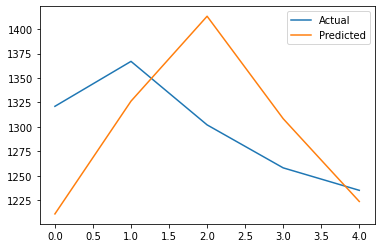

In [396]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# Auto Arima
auto arima  다음 링크의 내용을 참조하였음. https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

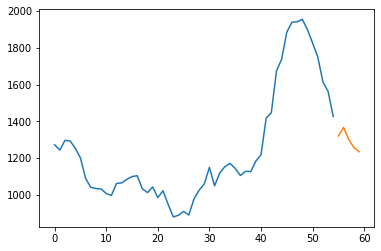

In [369]:
y_train = df['SHA_AVG'][:55]
y_test = df['SHA_AVG'][55:60]
y_train.plot()
y_test.plot()

In [370]:
model = pm.auto_arima (y_train, d = 1, m=12, seasonal = True, trace = True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=616.626, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=612.442, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=615.241, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=614.715, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=611.772, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=611.765, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=612.864, Time=0.92 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=612.528, Time=1.38 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=614.516, Time=1.99 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=616.765, Time=0.38 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=600.009, Time=0.93 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=598.163, Time=0.41 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=600.047, Time=0.91 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [371]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -295.096
Date:                Mon, 25 Apr 2022   AIC                            596.191
Time:                        08:40:50   BIC                            602.158
Sample:                             0   HQIC                           598.492
                                 - 55                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1774      0.161      1.105      0.269      -0.137       0.492
ar.L2          0.5127      0.108      4.756      0.000       0.301       0.724
sigma2      3224.8448    636.994      5.063      0.0

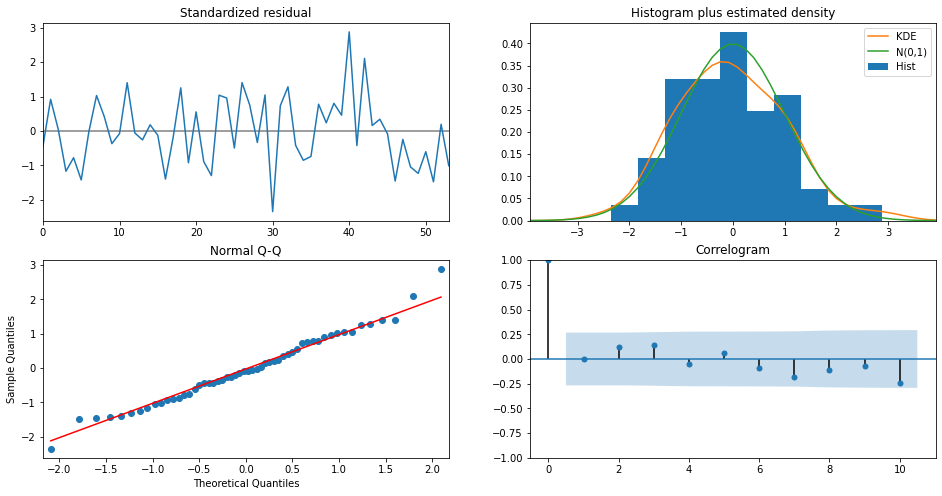

In [372]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [373]:
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])
y_predict.tail()

,Prediction
55,1376.217877
56,1297.482938
57,1257.481942
58,1210.019337
59,1181.092455


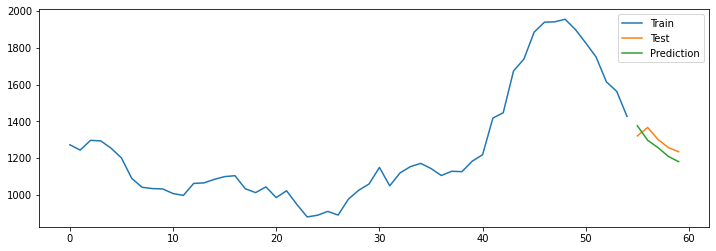

In [374]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [375]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [376]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [377]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -323.599
Date:                Mon, 25 Apr 2022   AIC                            653.198
Time:                        08:40:55   BIC                            659.430
Sample:                             0   HQIC                           655.631
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1811      0.144      1.261      0.207      -0.100       0.463
ar.L2          0.4540      0.098      4.614      0.000       0.261       0.647
sigma2      3242.1252    573.064      5.658      0.0

In [378]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA()모형")
fig.show()

#AutoARIMA 성능 평가

In [379]:
y_pred

[1376.2178772178734,
 1229.6768578875772,
 1326.2347590416541,
 1312.8217300673662,
 1219.9166737269181]

In [380]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 4.333


In [381]:
import sklearn.metrics as skm
skm.mean_absolute_error(y_test, y_pred)

57.336166942479664

In [382]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

5145.382337784651

In [383]:
y_actual = df['SHA_AVG'][55:60].values

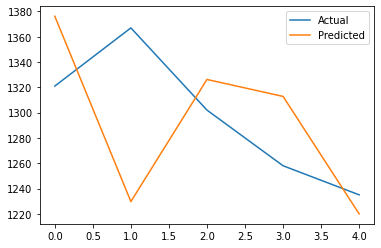

In [384]:
from matplotlib import pyplot
pyplot.plot(y_actual, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [385]:
y_pred

[1376.2178772178734,
 1229.6768578875772,
 1326.2347590416541,
 1312.8217300673662,
 1219.9166737269181]

In [386]:
df_all=df[['Date','SHA_AVG']]
df_all.set_index("Date", inplace=True)
df_all=df_all[:60]
df_all.tail()

,SHA_AVG
Date,
2022-02-28,1321
2022-03-07,1367
2022-03-14,1302
2022-03-21,1258
2022-03-28,1235


#AutoArima - Forecasting 5주

In [387]:
model2 = pm.auto_arima (df_all, d = 1, m=12, seasonal = True, trace = True)
model2.fit(df_all)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=672.478, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=665.721, Time=0.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=668.033, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=670.483, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=666.843, Time=0.25 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=666.887, Time=2.55 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=666.324, Time=1.69 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=664.916, Time=0.92 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=666.331, Time=1.63 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=668.288, Time=4.21 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=670.024, Time=0.58 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=656.494, Time=1.56 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=655.143, Time=0.61 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [388]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -323.577
Date:                Mon, 25 Apr 2022   AIC                            653.155
Time:                        08:41:31   BIC                            659.387
Sample:                             0   HQIC                           655.587
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1836      0.149      1.230      0.219      -0.109       0.476
ar.L2          0.4526      0.102      4.429      0.000       0.252       0.653
sigma2      3367.1225    618.197      5.447      0.000    2155.478    4578.767
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.78   Prob(JB):                         0.31
Heteroskedasticity (H):               2.44   Skew:                             0.47
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [389]:
def forecast_one_step():
    fc, conf_int = model2.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [390]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model2.update(new_ob)

In [391]:
y_pred

[1210.862467446964,
 1326.298216957118,
 1413.196779394598,
 1308.327319015658,
 1223.6003053810232]

In [392]:
# pred_upper

In [393]:
model2_fit=model2.fit(df_all)